## Time Series EDA

Goal:
1. Collect the stock data of Netflix
2. Preprocess data, train and test
3. Create an stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader as pdr
key='94faa34b39f1200bcdd18f454dea029c3b90d495'


In [3]:
df = pdr.get_data_tiingo('NFLX', api_key=key)
df.to_csv('NFLX.csv')

C:\Users\zmao\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df = pd.read_csv('NFLX.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NFLX,2017-05-05 00:00:00+00:00,156.60,158.5900,155.90,158.55,5316045,156.60,158.5900,155.90,158.55,5316045,0.0,1.0
1,NFLX,2017-05-08 00:00:00+00:00,156.38,157.6400,155.30,156.55,4780919,156.38,157.6400,155.30,156.55,4780919,0.0,1.0
2,NFLX,2017-05-09 00:00:00+00:00,157.46,157.8500,155.97,156.10,3886416,157.46,157.8500,155.97,156.10,3886416,0.0,1.0
3,NFLX,2017-05-10 00:00:00+00:00,160.28,161.1000,156.56,157.82,6834094,160.28,161.1000,156.56,157.82,6834094,0.0,1.0
4,NFLX,2017-05-11 00:00:00+00:00,158.54,160.5200,157.55,160.33,5534257,158.54,160.5200,157.55,160.33,5534257,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,NFLX,2022-04-28 00:00:00+00:00,199.52,201.4800,185.60,191.56,21363162,199.52,201.4800,185.60,191.56,21363162,0.0,1.0
1255,NFLX,2022-04-29 00:00:00+00:00,190.36,204.7100,190.00,198.68,16391889,190.36,204.7100,190.00,198.68,16391889,0.0,1.0
1256,NFLX,2022-05-02 00:00:00+00:00,199.46,200.2141,190.01,191.71,14591602,199.46,200.2141,190.01,191.71,14591602,0.0,1.0
1257,NFLX,2022-05-03 00:00:00+00:00,199.87,203.2000,194.77,198.29,11839431,199.87,203.2000,194.77,198.29,11839431,0.0,1.0


In [5]:
def date_index(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace = True)
    return df


In [6]:
stock = date_index(df)

In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-05-05 00:00:00+00:00 to 2022-05-04 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   close        1259 non-null   float64
 2   high         1259 non-null   float64
 3   low          1259 non-null   float64
 4   open         1259 non-null   float64
 5   volume       1259 non-null   int64  
 6   adjClose     1259 non-null   float64
 7   adjHigh      1259 non-null   float64
 8   adjLow       1259 non-null   float64
 9   adjOpen      1259 non-null   float64
 10  adjVolume    1259 non-null   int64  
 11  divCash      1259 non-null   float64
 12  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.7+ KB


In [8]:
stock.isna().sum()

symbol         0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

<AxesSubplot:xlabel='date'>

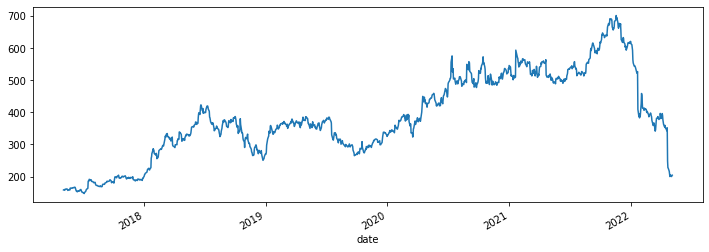

In [9]:
stock['high'].plot(figsize = (12,4))

### Time Resampling

In [10]:
#year end frequency
stock.resample(rule='A').min()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NFLX,146.17,147.27,144.25,146.130,2160300,146.17,147.27,144.25,146.130,2160300,0.0,1.0
2018-12-31 00:00:00+00:00,NFLX,201.07,201.65,195.42,196.100,3577717,201.07,201.65,195.42,196.100,3577717,0.0,1.0
2019-12-31 00:00:00+00:00,NFLX,254.59,265.00,252.28,255.710,2019322,254.59,265.00,252.28,255.710,2019322,0.0,1.0
2020-12-31 00:00:00+00:00,NFLX,298.84,322.90,290.25,302.395,1143952,298.84,322.90,290.25,302.395,1143952,0.0,1.0
2021-12-31 00:00:00+00:00,NFLX,484.98,488.57,478.54,479.750,1287513,484.98,488.57,478.54,479.750,1287513,0.0,1.0
2022-12-31 00:00:00+00:00,NFLX,188.54,200.19,185.60,191.560,3063783,188.54,200.19,185.60,191.560,3063783,0.0,1.0


In [11]:
stock.resample(rule='A').max()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NFLX,202.68,204.3800,198.09,201.95,40126110,202.68,204.3800,198.09,201.95,40126110,0.0,1.0
2018-12-31 00:00:00+00:00,NFLX,418.97,423.2056,413.08,421.38,58410362,418.97,423.2056,413.08,421.38,58410362,0.0,1.0
2019-12-31 00:00:00+00:00,NFLX,385.03,385.9900,378.80,382.77,38462343,385.03,385.9900,378.80,382.77,38462343,0.0,1.0
2020-12-31 00:00:00+00:00,NFLX,556.55,575.3700,541.00,567.98,24991528,556.55,575.3700,541.00,567.98,24991528,0.0,1.0
2021-12-31 00:00:00+00:00,NFLX,691.69,700.9894,686.09,692.35,32637450,691.69,700.9894,686.09,692.35,32637450,0.0,1.0
2022-12-31 00:00:00+00:00,NFLX,597.37,609.9900,590.56,605.61,132644607,597.37,609.9900,590.56,605.61,132644607,0.0,1.0


<AxesSubplot:xlabel='date'>

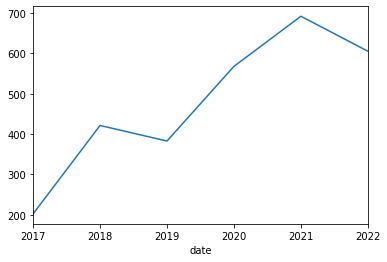

In [12]:
stock.resample(rule='A').max()['open'].plot()

<AxesSubplot:xlabel='date'>

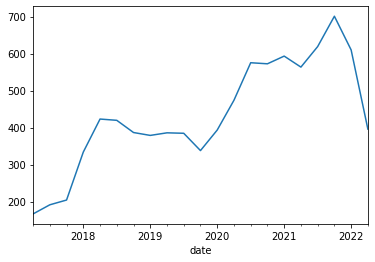

In [13]:
#quaterly start frequency
stock.resample(rule='QS').max()['high'].plot()

In [14]:
df1 = stock.reset_index()['close']

In [15]:
df1

0       156.60
1       156.38
2       157.46
3       160.28
4       158.54
         ...  
1254    199.52
1255    190.36
1256    199.46
1257    199.87
1258    204.01
Name: close, Length: 1259, dtype: float64

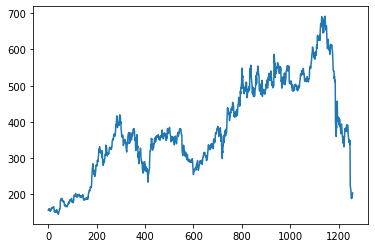

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape

(1259, 1)

In [19]:
#timer series train and test split 
train_size = int(len(df1)*0.65)
test_size=len(df1)-train_size
train,test = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [23]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [24]:
#reshape input to be [samples, time steps, features] for LSTM
# convert into 3 dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
X_train

array([[[0.01911937],
        [0.01871609],
        [0.02069585],
        ...,
        [0.07548761],
        [0.05935621],
        [0.06087769]],

       [[0.01871609],
        [0.02069585],
        [0.02586523],
        ...,
        [0.05935621],
        [0.06087769],
        [0.06562546]],

       [[0.02069585],
        [0.02586523],
        [0.02267561],
        ...,
        [0.06087769],
        [0.06562546],
        [0.0632974 ]],

       ...,

       [[0.36720927],
        [0.39954539],
        [0.37349685],
        ...,
        [0.64063646],
        [0.62754803],
        [0.62016058]],

       [[0.39954539],
        [0.37349685],
        [0.30994281],
        ...,
        [0.62754803],
        [0.62016058],
        [0.62258029]],

       [[0.37349685],
        [0.30994281],
        [0.34852068],
        ...,
        [0.62016058],
        [0.62258029],
        [0.62822628]]])

In [26]:
#create stack LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 169ms/step - loss: 0.0353 - val_loss: 0.0530
Epoch 2/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 3/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0043 - val_loss: 0.0283
Epoch 4/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0029 - val_loss: 0.0099
Epoch 5/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0021 - val_loss: 0.0067
Epoch 6/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 7/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 8/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 9/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0017 - val_loss: 0.0067
Epoch 10/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0018 - val_loss: 0.006

In [30]:
import tensorflow as tf

In [31]:
#prediciton and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [32]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

329.46250807205126

In [34]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

512.2072673415389

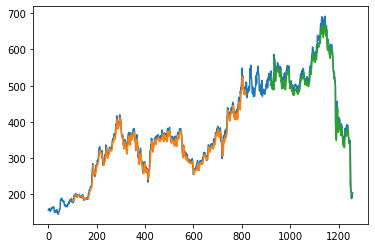

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test)

441

In [37]:
x_input = test[341:].reshape(1,-1)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [39]:
#predict the future 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09387849]
101
1 day input [0.84028083 0.82823728 0.84116073 0.8155338  0.80759642 0.82044655
 0.84094075 0.85802537 0.8577504  0.85597228 0.85155448 0.85124285
 0.85408418 0.83639463 0.82710075 0.81569878 0.77238231 0.74629711
 0.72387813 0.72166007 0.72347485 0.71683898 0.68380628 0.69570318
 0.66840812 0.67768368 0.66373369 0.46071638 0.44174366 0.40374322
 0.3914247  0.44091876 0.43662927 0.51504986 0.57002493 0.51933935
 0.4755646  0.48394193 0.4691487  0.47177005 0.488928   0.47679278
 0.44936941 0.45901159 0.47897419 0.46177959 0.44086376 0.44933275
 0.42383414 0.40564966 0.44702302 0.44843452 0.4552537  0.44007552
 0.42869189 0.40676785 0.39514592 0.37412011 0.35853864 0.38975656
 0.38605367 0.35589896 0.33883267 0.36218654 0.38744684 0.41287212
 0.42973676 0.41871975 0.43398959 0.41853644 0.42077284 0.41736325
 0.42590556 0.4503043  0.43133157 0.41871975 0.41666667 0.4497177
 0.42891186 0.40728113 0.39591582 0.3844222  0.36997727 0.36282813
 0.37443173 0.35738378 0.3513895  

In [40]:
day_new=np.arange(1,101)#previous 100 day
day_pred=np.arange(101,131)# future 30 day

In [41]:
len(df1)

1259

In [42]:
df2 = df1.tolist()
df2.extend(lst_output)

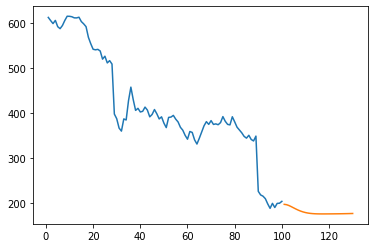

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

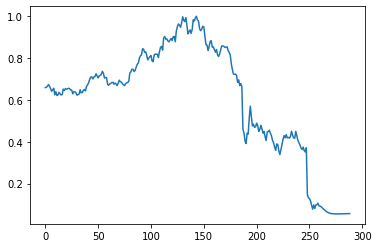

In [45]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1000:])

In [46]:
df2 = scaler.inverse_transform(df2).tolist()

In [48]:
len(df2)

1289